In [1]:
# 0 = No
# 1 = Yes

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

In [3]:
data = pd.read_csv('PCOS_Final_Data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              541 non-null    int64  
 1   Sl. No                  541 non-null    int64  
 2   Patient File No.        541 non-null    int64  
 3   PCOS (Y/N)              541 non-null    int64  
 4    Age (yrs)              541 non-null    int64  
 5   Weight (Kg)             541 non-null    float64
 6   Height(Cm)              541 non-null    float64
 7   BMI                     541 non-null    float64
 8   Blood Group             541 non-null    int64  
 9   Pulse rate(bpm)         541 non-null    int64  
 10  RR (breaths/min)        541 non-null    int64  
 11  Hb(g/dl)                541 non-null    float64
 12  Cycle(R/I)              541 non-null    int64  
 13  Cycle length(days)      541 non-null    int64  
 14  Marraige Status (Yrs)   541 non-null    fl

In [5]:
#There is a column without name,So, first naming it.
data = data.rename(columns={'Unnamed: 0': 'index'})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   541 non-null    int64  
 1   Sl. No                  541 non-null    int64  
 2   Patient File No.        541 non-null    int64  
 3   PCOS (Y/N)              541 non-null    int64  
 4    Age (yrs)              541 non-null    int64  
 5   Weight (Kg)             541 non-null    float64
 6   Height(Cm)              541 non-null    float64
 7   BMI                     541 non-null    float64
 8   Blood Group             541 non-null    int64  
 9   Pulse rate(bpm)         541 non-null    int64  
 10  RR (breaths/min)        541 non-null    int64  
 11  Hb(g/dl)                541 non-null    float64
 12  Cycle(R/I)              541 non-null    int64  
 13  Cycle length(days)      541 non-null    int64  
 14  Marraige Status (Yrs)   541 non-null    fl

In [7]:
#Droping the columns which are not related to the output
data = data.drop(['index','Sl. No','Patient File No.'],axis=1)

In [8]:
data.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL)
0,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,...,0,110,80,3,3,18.0,18.0,8.5,1.99,1.99
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,0,120,70,3,5,15.0,14.0,3.7,60.80,1.99
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,0,120,80,13,15,18.0,20.0,10.0,494.08,494.08
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,0,120,70,2,2,15.0,14.0,7.5,1.99,1.99
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,0,120,80,3,4,16.0,14.0,7.0,801.45,801.45


# Pair Plot

In [9]:
# Separate the features (X) and the target variable (y)
x = data.drop(columns='PCOS (Y/N)')  
y = data['PCOS (Y/N)'] 

In [10]:
# Compute mutual information between each feature and the target variable
mutual_info = mutual_info_classif(x, y)

In [11]:
# Create a DataFrame to store feature names and their corresponding mutual information scores
mi_scores = pd.Series(mutual_info, index=x.columns).sort_values(ascending=False)

# Print the mutual information scores for each feature
mi_scores

Follicle No. (R)          0.273416
Follicle No. (L)          0.191615
Weight gain(Y/N)          0.125571
Skin darkening (Y/N)      0.108892
hair growth(Y/N)          0.106495
Fast food (Y/N)           0.080478
AMH(ng/mL)                0.075945
FSH/LH                    0.065078
Waist:Hip Ratio           0.064409
PRL(ng/mL)                0.060775
 Age (yrs)                0.046168
Cycle length(days)        0.042665
Cycle(R/I)                0.041898
TSH (mIU/L)               0.039057
LH(mIU/mL)                0.033503
FSH(mIU/mL)               0.029318
BP _Diastolic (mmHg)      0.027324
Vit D3 (ng/mL)            0.023127
Avg. F size (L) (mm)      0.023027
Weight (Kg)               0.019147
No. of aborptions         0.018107
BMI                       0.013958
Waist(inch)               0.012834
  I   beta-HCG(mIU/mL)    0.011238
Hip(inch)                 0.009241
BP _Systolic (mmHg)       0.004246
RR (breaths/min)          0.003516
Pimples(Y/N)              0.002511
Hair loss(Y/N)      

In [51]:
top_10_features = mi_scores.index[:10]
X = x[top_10_features]

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Follicle No. (R)      541 non-null    int64  
 1   Follicle No. (L)      541 non-null    int64  
 2   Weight gain(Y/N)      541 non-null    int64  
 3   Skin darkening (Y/N)  541 non-null    int64  
 4   hair growth(Y/N)      541 non-null    int64  
 5   Fast food (Y/N)       541 non-null    int64  
 6   AMH(ng/mL)            541 non-null    float64
 7   FSH/LH                541 non-null    float64
 8   Waist:Hip Ratio       541 non-null    float64
 9   PRL(ng/mL)            541 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 42.4 KB


In [54]:
new_df = X

In [55]:
new_df['PCOS (Y/N)'] = y
new_df.head()

C:\Users\ashik\AppData\Local\Temp\ipykernel_14268\3199211567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['PCOS (Y/N)'] = y


,Follicle No. (R),Follicle No. (L),Weight gain(Y/N),Skin darkening (Y/N),hair growth(Y/N),Fast food (Y/N),AMH(ng/mL),FSH/LH,Waist:Hip Ratio,PRL(ng/mL),PCOS (Y/N)
0,3,3,0,0,0,1,2.07,2.160326,0.833333,45.16,0
1,5,3,0,0,0,0,1.53,6.174312,0.842105,20.09,0
2,15,13,0,0,0,1,6.63,6.295455,0.900000,10.52,1
3,2,2,0,0,0,0,1.22,3.415254,0.857143,36.90,0
4,4,3,0,0,0,0,2.26,4.422222,0.810811,30.09,0


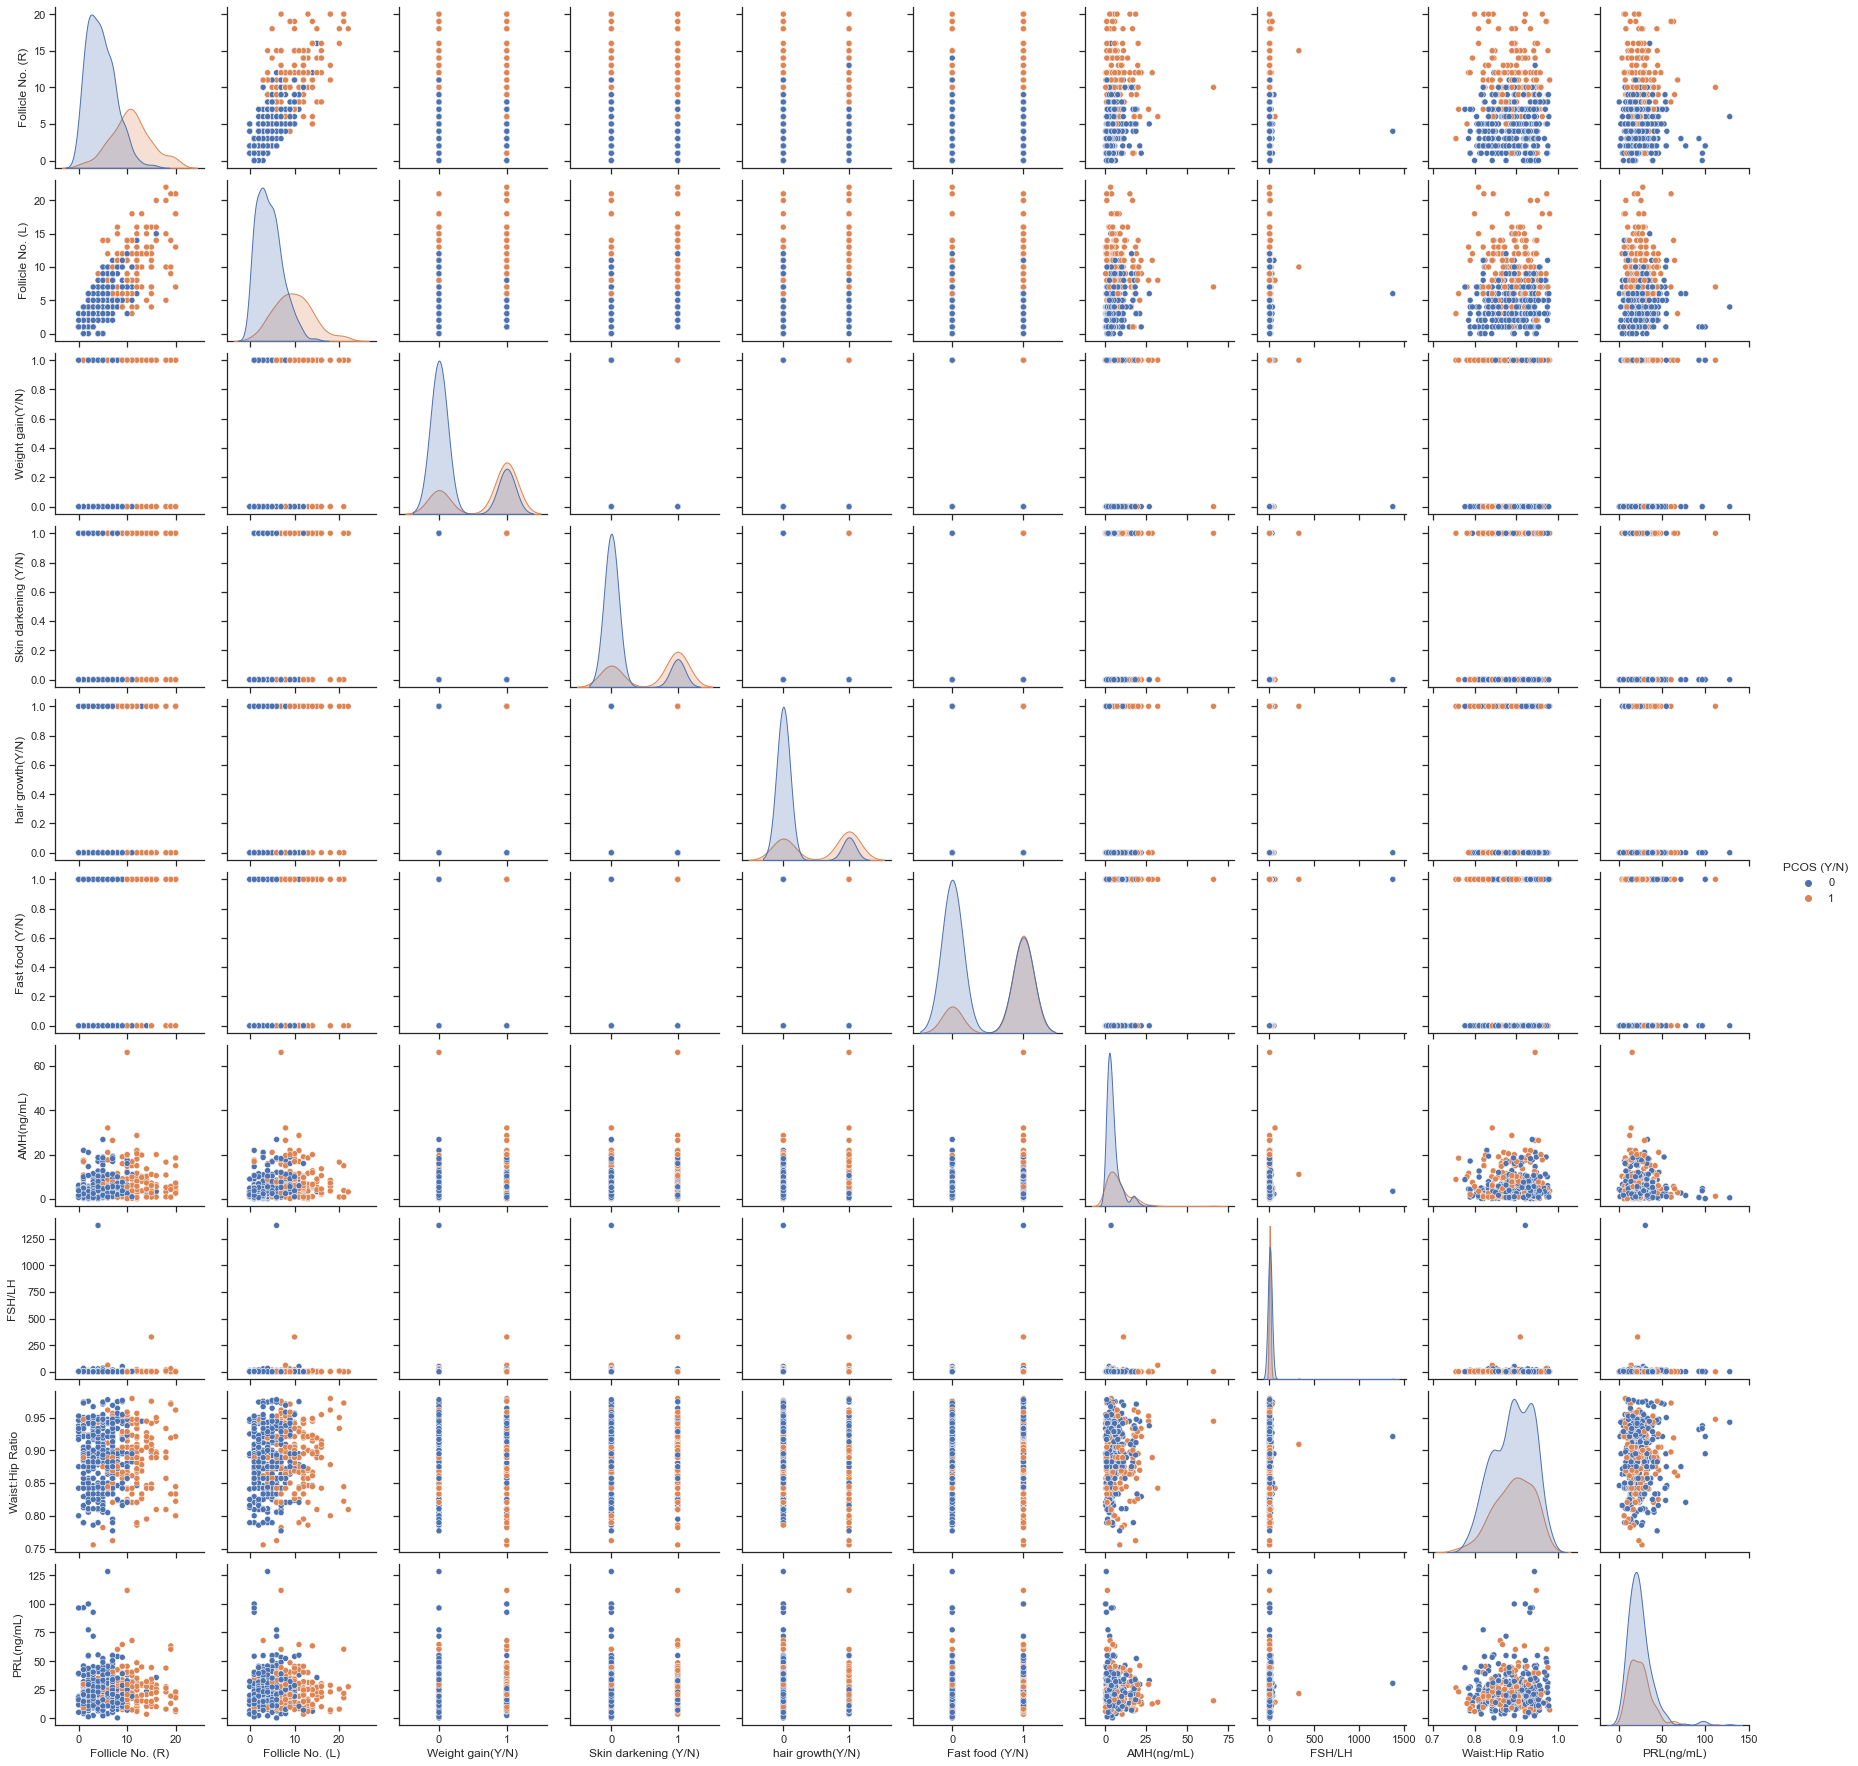

In [56]:
sb.set(style="ticks")
sb.pairplot(new_df, hue="PCOS (Y/N)")

# Show the pair plot
plt.show()